## scipy.opmimize.curve_fit example
https://www.youtube.com/watch?v=peBOquJ3fDo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as o

In [2]:
import scipy
sigmoid = scipy.special.expit
gaussian = scipy.stats.norm.pdf

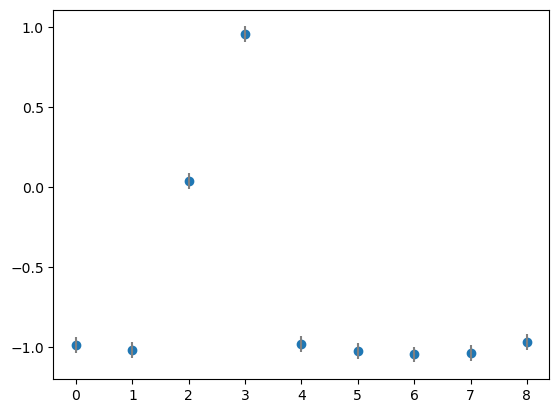

In [3]:
p0 = [2.75, 2, 0.5]
def growth(X, u, v, w):
    G_unlimited = -1+2*v*gaussian((X-u)/w)
    return np.clip(G_unlimited, -1, 1)

def target(X, u, v, w):
    (A, N) = X
    return np.clip(A+growth(N, u, v), -1, 1)

random_faktor = 1e-1
X_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
Y_data = [-1, -1, 0, 1, -1, -1, -1, -1, -1] + random_faktor*np.random.rand(len(X_data))-random_faktor/2

plt.scatter(X_data, Y_data)
Y_err = random_faktor/2
plt.errorbar(X_data, Y_data, Y_err, ls='', color='grey')
plt.show()

[2.60853361 3.82433501 0.41472753]


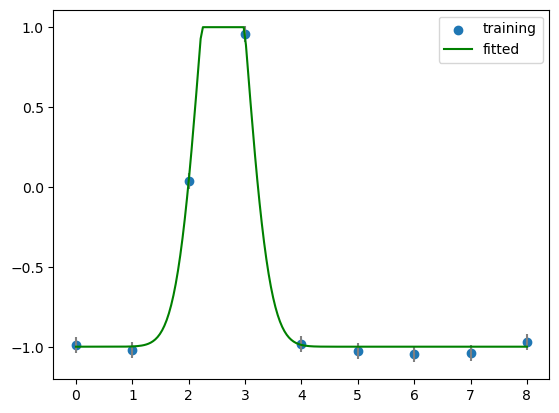

In [4]:
popt, pcov = o.curve_fit(growth, X_data, Y_data, p0=p0)
print(popt)

X = np.linspace(min(X_data), max(X_data), 200)
Y = growth(X, *popt)

plt.scatter(X_data, Y_data, label="training")
plt.errorbar(X_data, Y_data, Y_err, ls='', color='grey')
plt.plot(X, Y, color='green', label="fitted")
plt.legend()
plt.show()

cond(pcov) = 80474.72456964546


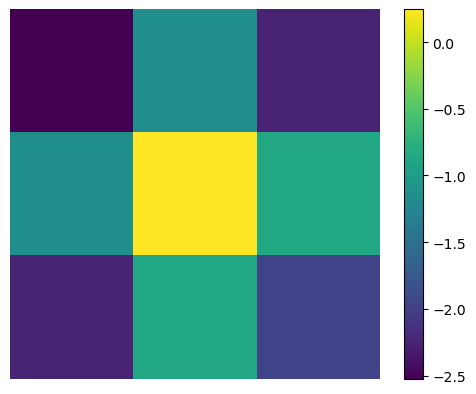

In [5]:
#print(pcov)
#print(np.diag(pcov))
print("cond(pcov) =", np.linalg.cond(pcov))
plt.imshow(np.log10(np.clip(np.abs(pcov), 1e-12, None)))
plt.axis('off')
plt.colorbar()
plt.show()